In [684]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.spatial import distance
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance


### This notebook has 3 parts. 
---Germany
### 1. Part one - policies
    1.1 Reading in the policy data of countries
    1.2 Extracting policy scores
    1.3 Preparing policy data frame
    1.4 Independent variable
    1.5 Statistics of policies
    1.6 Sub-indicators
### 2. Part two   - editorials 
    2.1 Reading in the editorship data
    2.2 Preparing editorship data
    2.3 Daily ratios 2020
    2.4 Daily ratios 2019

### 3. Part three -  X and Y
    3.1 Earthmover and Jensenshanon [weekly and yearly normalization]
    3.2 Outlier detection and removal
    3.3 Moving average 
    3.4 Testing with other measures of difference
    3.5 Feature selection - dimensionality reduction
       3.5.1 Correlation heatmap


### 4. Results
    4.1 Metrics/Correlation comparisons 

    





# Part one

### 1.1 Reading in the policy data of countries

In [685]:


c1_school_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c1_school_closing.csv")
del c1_school_closing['Unnamed: 0']
print("number of countries & number of days is", c1_school_closing.shape[0], ",", c1_school_closing.shape[1]-2)

c2_workplace_closing = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c2_workplace_closing.csv")
del c2_workplace_closing['Unnamed: 0']
print(c2_workplace_closing.shape)


c3_cancel_public_events = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c3_cancel_public_events.csv")
del c3_cancel_public_events['Unnamed: 0']
print(c3_cancel_public_events.shape)


c4_restrictions_on_gatherings= pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c4_restrictions_on_gatherings.csv")
del c4_restrictions_on_gatherings['Unnamed: 0']
print(c4_restrictions_on_gatherings.shape)



c5_close_public_transport = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c5_close_public_transport.csv")
del c5_close_public_transport['Unnamed: 0']
print(c5_close_public_transport.shape)

c6_stay_at_home_requirements = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c6_stay_at_home_requirements.csv")
del c6_stay_at_home_requirements['Unnamed: 0']
print(c6_stay_at_home_requirements.shape)



c7_movementrestrictions = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c7_movementrestrictions.csv")
del c7_movementrestrictions['Unnamed: 0']
print(c7_movementrestrictions.shape)

c8_internationaltravel = pd.read_csv("/Users/luna/Downloads/covid-policy-tracker-master/data/timeseries/c8_internationaltravel.csv")
del c8_internationaltravel['Unnamed: 0']
print(c8_internationaltravel.shape)


number of countries & number of days is 186 , 562
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)
(186, 564)


In [686]:
#let's print out one of the 8 above dataframes

c8_internationaltravel.head(10)

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ARE,United Arab Emirates,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARG,Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN
7,AUS,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
8,AUT,Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
9,AZE,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN


In [687]:

"merging all the above 8 dataframes into 1"

frames = [c1_school_closing, c2_workplace_closing, c3_cancel_public_events,
          c4_restrictions_on_gatherings,c5_close_public_transport, 
          c6_stay_at_home_requirements,c7_movementrestrictions,c8_internationaltravel]

result = pd.concat(frames, axis=0) #default axis is 0

print( result.shape)

(1488, 564)


In [688]:
# here we will have all 8 indicators of all countries at one place in the result dataframe
result.head()

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Extracting policy scores of Germany, Hungary, italy, Poland and Sweden

In [689]:
#extracting restrinction policy scores of 8 policies for 5 different countries seperateöy
#de, hu, it, pl, se  

deutch_policy = result[result['country_name'].str.contains('Germany')]
hungary_policy = result[result['country_name'].str.contains('Hungary')]
italy_policy = result[result['country_name'].str.contains('Italy')]
poland_policy = result[result['country_name'].str.contains('Poland')]
sweden_policy = result[result['country_name'].str.contains('Sweden')]


#reseting index & taking away the extra index column
deutch_policy.reset_index(inplace=True)
del deutch_policy['index']
print("number of policies & number of days is", deutch_policy.shape[0],",", deutch_policy.shape[1]-2 )

hungary_policy.reset_index(inplace=True)
del hungary_policy['index']

italy_policy.reset_index(inplace=True)
del italy_policy['index']

poland_policy.reset_index(inplace=True)
del poland_policy['index']

sweden_policy.reset_index(inplace=True)
del sweden_policy['index']



number of policies & number of days is 8 , 562


In [690]:
#summing up the scores of 8 policies into one new row as the sum of sub policies (previous rows )
# suming previous rows to get the total daily policy score 

deutch_policy.loc["Daily_Sum"] = deutch_policy.sum()
hungary_policy.loc["Daily_Sum"] = hungary_policy.sum()
italy_policy.loc["Daily_Sum"] = italy_policy.sum()
poland_policy.loc["Daily_Sum"] = poland_policy.sum()
sweden_policy.loc["Daily_Sum"] =sweden_policy.sum()



/Users/luna/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [691]:
#inspect deutch dataframe
deutch_policy.head(10)

#The last row is the sum of all the above rows called "Daily_Sum"

,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,...,06Jul2021,07Jul2021,08Jul2021,09Jul2021,10Jul2021,11Jul2021,12Jul2021,13Jul2021,14Jul2021,15Jul2021
0,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
3,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
4,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
5,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
6,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
7,DEU,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
Daily_Sum,DEUDEUDEUDEUDEUDEUDEUDEU,GermanyGermanyGermanyGermanyGermanyGermanyGerm...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,0.0,0.0


### 1.3 Preparing policy dataframe of  Germany

In [692]:

#extract the germany policy column 
#Transpose so that we get the total sum as a column at the end 

deutch_policy_transposed =deutch_policy.T 
deutch_policy_transposed.reset_index(inplace=True)

deutch_policy_transposed = deutch_policy_transposed.drop(labels=0, axis=0)
deutch_policy_transposed.rename(columns=deutch_policy_transposed.iloc[0])
deutch_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
1,country_name,Germany,Germany,Germany,Germany,Germany,Germany,Germany,Germany,GermanyGermanyGermanyGermanyGermanyGermanyGerm...
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0


In [693]:
#drop the first row
deutch_policy_transposed=deutch_policy_transposed.iloc[1:,:]
deutch_policy_transposed.head()

,index,0,1,2,3,4,5,6,7,Daily_Sum
2,01Jan2020,0,0,0,0,0,0,0,0,0
3,02Jan2020,0,0,0,0,0,0,0,0,0
4,03Jan2020,0,0,0,0,0,0,0,0,0
5,04Jan2020,0,0,0,0,0,0,0,0,0
6,05Jan2020,0,0,0,0,0,0,0,0,0


In [694]:
print(deutch_policy_transposed.iloc[60:65, :])

        index  0  1  2  3  4  5  6  7 Daily_Sum
62  01Mar2020  2  0  1  0  0  0  0  1         4
63  02Mar2020  2  0  1  0  0  0  0  1         4
64  03Mar2020  2  0  1  0  0  0  0  1         4
65  04Mar2020  2  0  1  0  0  0  0  1         4
66  05Mar2020  2  0  1  0  0  0  0  1         4


In [695]:
deutch_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      562 non-null    object
 1   0          560 non-null    object
 2   1          560 non-null    object
 3   2          560 non-null    object
 4   3          560 non-null    object
 5   4          560 non-null    object
 6   5          560 non-null    object
 7   6          560 non-null    object
 8   7          560 non-null    object
 9   Daily_Sum  562 non-null    object
dtypes: object(10)
memory usage: 48.3+ KB


In [696]:
deutch_policy_transposed.iloc[:,1] = deutch_policy_transposed.iloc[:,1].astype(str).astype(float)
deutch_policy_transposed.iloc[:,2] = deutch_policy_transposed.iloc[:,2].astype(str).astype(float)
deutch_policy_transposed.iloc[:,3] = deutch_policy_transposed.iloc[:,3].astype(str).astype(float)
deutch_policy_transposed.iloc[:,4] = deutch_policy_transposed.iloc[:,4].astype(str).astype(float)
deutch_policy_transposed.iloc[:,5] = deutch_policy_transposed.iloc[:,5].astype(str).astype(float)
deutch_policy_transposed.iloc[:,6] = deutch_policy_transposed.iloc[:,6].astype(str).astype(float)
deutch_policy_transposed.iloc[:,7] = deutch_policy_transposed.iloc[:,7].astype(str).astype(float)
deutch_policy_transposed.iloc[:,8] = deutch_policy_transposed.iloc[:,8].astype(str).astype(float)
deutch_policy_transposed.iloc[:,9] = deutch_policy_transposed.iloc[:,9].astype(str).astype(float)

deutch_policy_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 2 to 563
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      562 non-null    object 
 1   0          560 non-null    float64
 2   1          560 non-null    float64
 3   2          560 non-null    float64
 4   3          560 non-null    float64
 5   4          560 non-null    float64
 6   5          560 non-null    float64
 7   6          560 non-null    float64
 8   7          560 non-null    float64
 9   Daily_Sum  562 non-null    float64
dtypes: float64(9), object(1)
memory usage: 48.3+ KB


In [697]:
# rename the "index column" to "Date" and change it from string to datetime

deutch_policy_transposed.columns
#deutch_policy_transposed.columns=['Date', 0, 1, 2, 3, 4, 5, 6, 7, 'Daily_Sum']

deutch_policy_transposed.columns=['Date', 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum']


deutch_policy_transposed['Date']=pd.to_datetime(deutch_policy_transposed['Date'])

deutch_policy_transposed.head()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1.4 Independent variable for Germany = weekely policy average

In [698]:

#extract the week number (of the year) and add it as a new column at the end

deutch_policy_transposed['week_of_year']= deutch_policy_transposed['Date'].apply(lambda x: x.isocalendar()[1])
deutch_policy_transposed.head(10)

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
2,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [699]:
# slice and set a new dataframe where 1<week_of_year<52 and  data belongs to 2020

deutch_policy_transposed_FirstLastWeekDropped=deutch_policy_transposed.loc[( (deutch_policy_transposed['Date'] < '2021-01-01 00:00:00') & (deutch_policy_transposed['week_of_year']< 52) & (1<deutch_policy_transposed['week_of_year']))]

#head
deutch_policy_transposed_FirstLastWeekDropped.head()


,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
7,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
10,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
11,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [700]:
#tail
deutch_policy_transposed_FirstLastWeekDropped.tail()

,Date,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
352,2020-12-16,3.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,19.0,51
353,2020-12-17,3.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,19.0,51
354,2020-12-18,3.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,19.0,51
355,2020-12-19,3.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,19.0,51
356,2020-12-20,3.0,3.0,2.0,4.0,1.0,2.0,1.0,3.0,19.0,51


##  1.5 Statistics of policies for Germany

In [701]:
deutch_policy_transposed_FirstLastWeekDropped.describe()

,school,workplace,events,gatherings,transport,home,movementrestrict,internationaltravel,Daily_Sum,week_of_year
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,1.537143,1.580000,1.662857,3.060000,0.060000,0.534286,1.160000,2.617143,12.211429,26.500000
std,0.982683,0.841713,0.730461,1.564048,0.237827,0.777714,0.884505,1.258435,5.917860,14.451529
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,3.000000,12.000000,14.000000
50%,1.000000,2.000000,2.000000,4.000000,0.000000,0.000000,1.000000,3.000000,14.000000,26.500000
75%,2.000000,2.000000,2.000000,4.000000,0.000000,1.000000,2.000000,3.000000,15.000000,39.000000
max,3.000000,3.000000,2.000000,4.000000,1.000000,2.000000,2.000000,4.000000,19.000000,51.000000


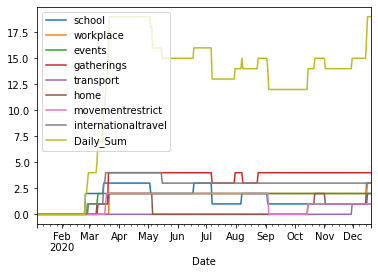

In [702]:
deutch_policy_transposed_FirstLastWeekDropped.plot(x="Date", y=[ 'school', 'workplace', 'events','gatherings','transport', 
                  'home','movementrestrict','internationaltravel', 'Daily_Sum'])
plt.show()

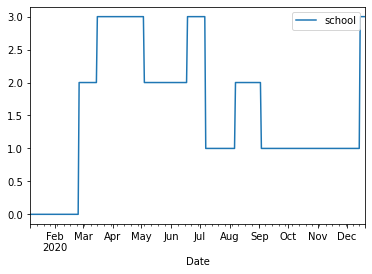

In [703]:
df1 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df1.plot(x="Date", y="school")
plt.show()

Daily policy fluctuations Germany


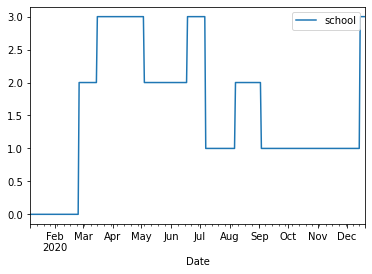

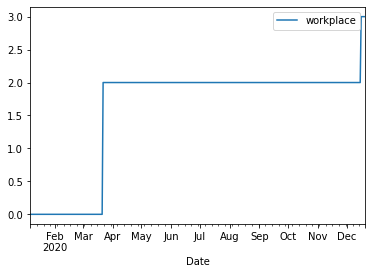

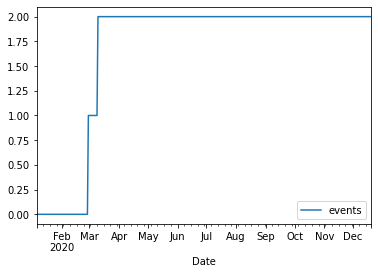

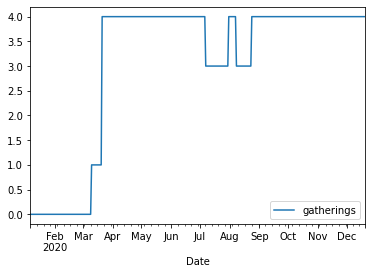

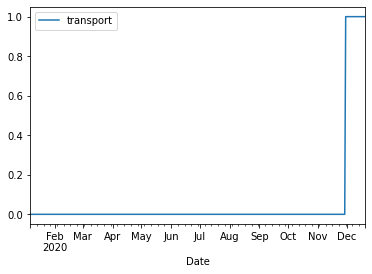

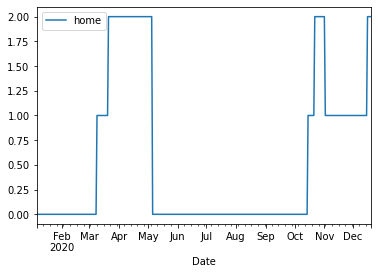

In [704]:
df1 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "school"]]
df2 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "workplace"]]
df3 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "events"]]
df4 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "gatherings"]]
df5 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "transport"]]
df6 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "home"]]
df7 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "movementrestrict"]]
df8 = deutch_policy_transposed_FirstLastWeekDropped[["Date", "internationaltravel"]]


#define number of rows and columns for subplots
nrow=3
ncol=2

# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6, df7, df8]
#fig, axes = plt.subplots(nrow, ncol)

# plot counter
count=0
for r in range(nrow):
    for c in range( ncol):
        yi=df_list[count].columns[1]
        df_list[count].plot(x="Date", y=yi)

        count+=1
print("Daily policy fluctuations Germany")       
plt.show()

In [705]:
#deutch_policy_transposed_FirstLastWeekDropped.hist(figsize=(20,15))
#plt.show()

In [706]:
#extract only the two columns of daily_sum and week_of year
policy_2020_total_deutch=deutch_policy_transposed_FirstLastWeekDropped.iloc[:,9:11]
print(policy_2020_total_deutch.iloc[47:70,:])

    Daily_Sum  week_of_year
54        0.0             8
55        0.0             8
56        0.0             9
57        0.0             9
58        2.0             9
59        2.0             9
60        3.0             9
61        4.0             9
62        4.0             9
63        4.0            10
64        4.0            10
65        4.0            10
66        4.0            10
67        4.0            10
68        4.0            10
69        4.0            10
70        5.0            11
71        7.0            11
72        7.0            11
73        7.0            11
74        7.0            11
75        7.0            11
76        7.0            11


In [707]:
# 7 days 50 weeks = 350 data points
policy_2020_total_deutch.shape

(350, 2)

## Group the daily sum by week

In [708]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_deutch=policy_2020_total_deutch.groupby(['week_of_year']).sum()
weekly_policy_2020_deutch.columns=["Weekly_sum"] 

In [709]:
weekly_policy_2020_deutch.head(10)

,Weekly_sum
week_of_year,
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,15.0
10,28.0


In [710]:
print(weekly_policy_2020_deutch.iloc[:18, :])

              Weekly_sum
week_of_year            
2                    0.0
3                    0.0
4                    0.0
5                    0.0
6                    0.0
7                    0.0
8                    0.0
9                   15.0
10                  28.0
11                  47.0
12                  94.0
13                 133.0
14                 133.0
15                 133.0
16                 133.0
17                 133.0
18                 133.0
19                 116.0


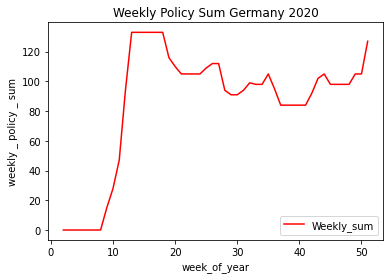

In [711]:
ax = plt.gca()
weekly_policy_2020_deutch.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Policy Sum Germany 2020')
plt.ylabel('weekly _ policy _ sum')
plt.xlabel('week_of_year')

plt.show()

## Normalize weekly sums 

In [712]:
#average weekly independent variable 
weekly_ratio_policy_2020_deutch=weekly_policy_2020_deutch/7
weekly_ratio_policy_2020_deutch.head(10)

,Weekly_sum
week_of_year,
2,0.000000
3,0.000000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,2.142857
10,4.000000


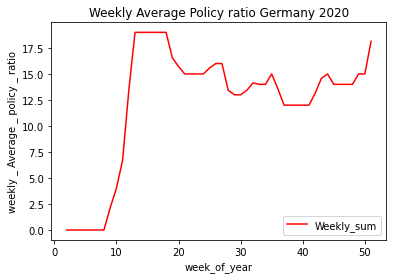

In [713]:
ax = plt.gca()
weekly_ratio_policy_2020_deutch.plot(kind='line',y='Weekly_sum', color='red', ax=ax)
plt.title('Weekly Average Policy ratio Germany 2020')
plt.ylabel('weekly _ Average _ policy _ ratio')
plt.xlabel('week_of_year')

plt.show()

In [714]:
#the final independent variable in list form 
weekly_ratio_policy_2020_deutch=weekly_ratio_policy_2020_deutch['Weekly_sum'].tolist()
print(weekly_ratio_policy_2020_deutch[:14])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.142857142857143, 4.0, 6.714285714285714, 13.428571428571429, 19.0, 19.0, 19.0]


## 1.6 Sub- indicators
### Let's break down the total policy sum into sub policy indicators: define  sub features of IV

In [717]:
#extract only the two columns of daily_sum and week_of year
policy_2020_indicators_deutch=deutch_policy_transposed_FirstLastWeekDropped.iloc[:, 1:11]
print(policy_2020_indicators_deutch.iloc[70:90,:])

    school  workplace  events  gatherings  transport  home  movementrestrict  \
77     3.0        0.0     2.0         1.0        0.0   1.0               0.0   
78     3.0        0.0     2.0         1.0        0.0   1.0               0.0   
79     3.0        0.0     2.0         1.0        0.0   1.0               1.0   
80     3.0        0.0     2.0         1.0        0.0   1.0               2.0   
81     3.0        0.0     2.0         1.0        0.0   1.0               2.0   
82     3.0        0.0     2.0         4.0        0.0   2.0               2.0   
83     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
84     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
85     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
86     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
87     3.0        2.0     2.0         4.0        0.0   2.0               2.0   
88     3.0        2.0     2.0         4.

### Let's  drop the transportation as its change is small 

In [718]:
#extract only the two columns of daily_sum and week_of year

policy_2020_indicators_deutch.drop('transport', inplace=True, axis=1)
print(policy_2020_indicators_deutch.iloc[70:90,:])


    school  workplace  events  gatherings  home  movementrestrict  \
77     3.0        0.0     2.0         1.0   1.0               0.0   
78     3.0        0.0     2.0         1.0   1.0               0.0   
79     3.0        0.0     2.0         1.0   1.0               1.0   
80     3.0        0.0     2.0         1.0   1.0               2.0   
81     3.0        0.0     2.0         1.0   1.0               2.0   
82     3.0        0.0     2.0         4.0   2.0               2.0   
83     3.0        2.0     2.0         4.0   2.0               2.0   
84     3.0        2.0     2.0         4.0   2.0               2.0   
85     3.0        2.0     2.0         4.0   2.0               2.0   
86     3.0        2.0     2.0         4.0   2.0               2.0   
87     3.0        2.0     2.0         4.0   2.0               2.0   
88     3.0        2.0     2.0         4.0   2.0               2.0   
89     3.0        2.0     2.0         4.0   2.0               2.0   
90     3.0        2.0     2.0     

In [719]:
#group by week and sum up the daily_sums (within a week, i.e. within a group)
weekly_policy_2020_deutch_indicators=policy_2020_indicators_deutch.groupby(['week_of_year']).sum()
weekly_policy_2020_deutch_indicators.columns=["weekly_school", "weekly_workplace", "weekly_events","weekly_gatherings"
                                             ,"weekly_transportation","weekly_home", "weekly_movement", "weekly_travel", "weekly_sum"] 
print(weekly_policy_2020_deutch_indicators.iloc[45:50, :])


              weekly_school  weekly_workplace  weekly_events  \
week_of_year                                                   
47                      7.0              14.0           14.0   
48                      7.0              14.0           14.0   
49                      7.0              14.0           14.0   
50                      7.0              14.0           14.0   
51                     19.0              19.0           14.0   

              weekly_gatherings  weekly_home  weekly_movement  weekly_travel  \
week_of_year                                                                   
47                         28.0          7.0              7.0           21.0   
48                         28.0          7.0              7.0           21.0   
49                         28.0          7.0              7.0           21.0   
50                         28.0          7.0              7.0           21.0   
51                         28.0         12.0              7.0          

### Now we have weekly average of every single indicator (except transporation which was dropped)

In [720]:
#average weekly independent variable 
weekly_policy_2020_deutch_indicators_ratio=weekly_policy_2020_deutch_indicators/7
weekly_policy_2020_deutch_indicators_ratio.head(10)

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_home,weekly_movement,weekly_travel,weekly_sum
week_of_year,,,,,,,,
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
5,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
6,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
7,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
9,1.428571,0.0,0.285714,0.000000,0.0,0.0,0.428571,2.142857
10,2.000000,0.0,1.000000,0.000000,0.0,0.0,1.000000,4.000000


# Part two

## 2.1  Reading in the editorship data


In [721]:

#Reading in the editorship data of the 5 countries


from datetime import datetime
import datetime
import sys
sys.path.insert(1, "../src")



revs_deutch = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/dewiki.csv")
revs_hungary = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/huwiki.csv")
revs_italy = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/itwiki.csv")
revs_poland = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/plwiki.csv")
revs_sweden = pd.read_csv("/Users/luna/Downloads/Wikipedia_Rhythms-master/data/revisions_countrywide/sewiki.csv")

print(revs_deutch.shape)
print(revs_hungary.shape)
print(revs_italy.shape)
print(revs_poland.shape)
print(revs_sweden.shape)

(29638, 5)
(29632, 5)
(29627, 5)
(29639, 5)
(3646, 5)


In [722]:
#test #get week number
datetime.date(2010, 6, 16).weekday()


2

In [723]:
#test #get hour number
datetime.datetime(2017, 11, 28, 23, 55, 59, 342380).hour


23

In [724]:
revs_deutch.head()

,y,m,d,h,c
0,2018,1,1,0,987
1,2018,1,1,1,1024
2,2018,1,1,2,766
3,2018,1,1,3,681
4,2018,1,1,4,465


In [725]:

#making up the datetime structure 
revs_deutch['dateInt']=revs_deutch['y'].astype(str) + revs_deutch['m'].astype(str).str.zfill(2)+ revs_deutch['d'].astype(str).str.zfill(2)
revs_deutch['Date'] = pd.to_datetime(revs_deutch['dateInt'], format='%Y%m%d')      
revs_deutch = revs_deutch.reset_index()
revs_deutch.head()

,index,y,m,d,h,c,dateInt,Date
0,0,2018,1,1,0,987,20180101,2018-01-01
1,1,2018,1,1,1,1024,20180101,2018-01-01
2,2,2018,1,1,2,766,20180101,2018-01-01
3,3,2018,1,1,3,681,20180101,2018-01-01
4,4,2018,1,1,4,465,20180101,2018-01-01


In [726]:
print(revs_deutch.iloc[50:55, :])

    index     y  m  d  h    c   dateInt       Date
50     50  2018  1  3  2  517  20180103 2018-01-03
51     51  2018  1  3  3  520  20180103 2018-01-03
52     52  2018  1  3  4  397  20180103 2018-01-03
53     53  2018  1  3  5  254  20180103 2018-01-03
54     54  2018  1  3  6  476  20180103 2018-01-03


In [727]:

#extract the week number and add it as a new column
revs_deutch['week_of_year']= revs_deutch['Date'].apply(lambda x: x.isocalendar()[1])

#extract the hour of the week
#revs_deutch['hour_of_week']=revs_deutch['Date'].apply(lambda x: x.hour+ (24*x.weekday())  )
revs_deutch['hour_of_week']=revs_deutch['Date'].apply(lambda x: 24*x.weekday()) + revs_deutch['h']


#https://stackoverflow.com/questions/9847213/how-do-i-get-the-day-of-week-given-a-date
revs_deutch.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
0,0,2018,1,1,0,987,20180101,2018-01-01,1,0
1,1,2018,1,1,1,1024,20180101,2018-01-01,1,1
2,2,2018,1,1,2,766,20180101,2018-01-01,1,2
3,3,2018,1,1,3,681,20180101,2018-01-01,1,3
4,4,2018,1,1,4,465,20180101,2018-01-01,1,4
5,5,2018,1,1,5,294,20180101,2018-01-01,1,5
6,6,2018,1,1,6,263,20180101,2018-01-01,1,6
7,7,2018,1,1,7,300,20180101,2018-01-01,1,7
8,8,2018,1,1,8,590,20180101,2018-01-01,1,8
9,9,2018,1,1,9,965,20180101,2018-01-01,1,9


### 2.2 Prepare editorship data Germany for 2020

In [728]:
#We get all data which is from 2020 and  where  1< week_of_year <52 
revs_deutch_2020=revs_deutch.loc[(revs_deutch['Date'] >= '2020-01-01 00:00:00') & (revs_deutch['Date'] < '2021-01-01 00:00:00')& (revs_deutch['week_of_year'] < 52)& (1<revs_deutch['week_of_year'])]
revs_deutch_2020.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17640,17640,2020,1,6,0,616,20200106,2020-01-06,2,0
17641,17641,2020,1,6,1,370,20200106,2020-01-06,2,1
17642,17642,2020,1,6,2,305,20200106,2020-01-06,2,2
17643,17643,2020,1,6,3,620,20200106,2020-01-06,2,3
17644,17644,2020,1,6,4,669,20200106,2020-01-06,2,4
17645,17645,2020,1,6,5,633,20200106,2020-01-06,2,5
17646,17646,2020,1,6,6,519,20200106,2020-01-06,2,6
17647,17647,2020,1,6,7,979,20200106,2020-01-06,2,7
17648,17648,2020,1,6,8,860,20200106,2020-01-06,2,8
17649,17649,2020,1,6,9,1202,20200106,2020-01-06,2,9


In [729]:
#tail
revs_deutch_2020.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
26035,26035,2020,12,20,19,1514,20201220,2020-12-20,51,163
26036,26036,2020,12,20,20,1372,20201220,2020-12-20,51,164
26037,26037,2020,12,20,21,1228,20201220,2020-12-20,51,165
26038,26038,2020,12,20,22,942,20201220,2020-12-20,51,166
26039,26039,2020,12,20,23,963,20201220,2020-12-20,51,167


In [730]:

#group by 'week_of_year', 'hour_of_week' 

grouped_deutch_2020=revs_deutch_2020.groupby(['week_of_year', 'hour_of_week']).sum()

grouped_deutch_2020 = grouped_deutch_2020.reset_index()
grouped_deutch_2020.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,17640,2020,1,6,0,616
1,2,1,17641,2020,1,6,1,370
2,2,2,17642,2020,1,6,2,305
3,2,3,17643,2020,1,6,3,620
4,2,4,17644,2020,1,6,4,669
5,2,5,17645,2020,1,6,5,633
6,2,6,17646,2020,1,6,6,519
7,2,7,17647,2020,1,6,7,979
8,2,8,17648,2020,1,6,8,860
9,2,9,17649,2020,1,6,9,1202


In [731]:
#tail
grouped_deutch_2020.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8395,51,163,26035,2020,12,20,19,1514
8396,51,164,26036,2020,12,20,20,1372
8397,51,165,26037,2020,12,20,21,1228
8398,51,166,26038,2020,12,20,22,942
8399,51,167,26039,2020,12,20,23,963


In [732]:

#populate the numpy array 

array_weekly_events_deutch_2020 = np.zeros((52,168))


for  i in range (grouped_deutch_2020.shape[0]):
    
    week=grouped_deutch_2020.iloc[i]['week_of_year']
    hour=grouped_deutch_2020.iloc[i]['hour_of_week']
    array_weekly_events_deutch_2020[week][hour]= grouped_deutch_2020.iloc[i]['c']



In [733]:
print(array_weekly_events_deutch_2020)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [ 616.  370.  305. ... 1276.  939. 1015.]
 ...
 [ 522.  676.  368. ... 1165.  989.  748.]
 [ 516.  650.  448. ... 1075. 1237.  989.]
 [ 532.  662.  661. ... 1228.  942.  963.]]


In [734]:
print(array_weekly_events_deutch_2020[3][:])

[ 502.  309.  245.  456.  538.  625. 1047. 1009. 1079.  974. 1134. 1160.
 1210. 1309. 1320. 1335. 1552. 1621. 1691. 1697. 1590. 1396. 1107.  707.
  573.  431.  235.  627.  569.  621.  798. 1116. 1001. 1070. 1070. 1096.
 1162. 1314. 1181. 1265. 1386. 1713. 1320. 1372. 1778. 1536.  938.  791.
  407.  295.  374.  774.  586.  718.  769. 1018. 1232. 1250. 1397. 1150.
 1193. 1337. 1476. 1413. 1392. 1585. 1851. 1392. 1346. 1232.  886.  620.
  447.  320.  252.  682.  499.  725.  686. 1125. 1180. 1260. 1168.  970.
 1122. 1166. 1535. 1154. 1402. 1523. 1317. 1041. 1512. 1161.  998.  652.
  379.  288.  224.  618.  436.  577.  589.  898.  991. 1076. 1211. 1169.
 1195. 1111. 1189. 1301. 1510. 1158. 1178. 1016. 1306. 1102. 1112.  682.
  407.  281.  262.  711.  458.  688.  633.  858. 1049. 1268. 1440. 1352.
 1234. 1426. 1519. 1316. 1636. 1441. 1719. 1434. 1481. 1380.  964.  778.
  561.  366.  421.  777.  551.  602.  639.  816.  952. 1473. 1511. 1641.
 1867. 1574. 1514. 1425. 1557. 1962. 1510. 1501. 15

In [735]:
#we need the weekly_sums to be able to devide the daily counts by this total weely sum
weekly_sum_deutch_2020=np.sum(array_weekly_events_deutch_2020 , axis=1)
print(weekly_sum_deutch_2020)

[     0.      0. 175960. 176125. 186821. 184773. 185034. 180994. 186485.
 197641. 184617. 178193. 185274. 194772. 204332. 196226. 216421. 203550.
 212990. 190171. 192308. 184851. 177861. 179556. 201572. 178276. 168020.
 172906. 174054. 171909. 176591. 170752. 162886. 170912. 168071. 184426.
 170270. 155431. 157816. 171885. 172133. 168398. 171735. 172835. 179803.
 177330. 183572. 199079. 195787. 187348. 183383. 186243.]


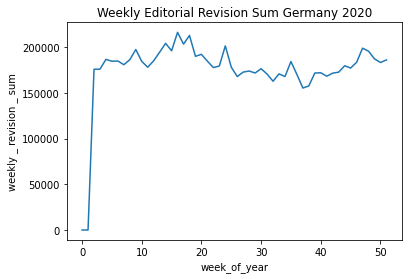

In [736]:
ax = plt.gca()

plt.plot(weekly_sum_deutch_2020) 
plt.title('Weekly Editorial Revision Sum Germany 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

In [737]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2020_deutch=np.sum(weekly_sum_deutch_2020)
yearly_sum_2020_deutch

9108378.0

### 2.3  168 daily ratios for 2020 germany

In [738]:

array_weekly_ratios_deutch_2020=np.zeros((50,168))
    
for i in range (50):
    
    #becaue the first two rows of array_weekly_events_deutch_2020 
    #were all zeros( belonging to the 0th and 1st week) --> we move the indice by 2  -->so we skip the first two rows of the nummpy array
    
    array_weekly_ratios_deutch_2020[i]=array_weekly_events_deutch_2020[i+2]/weekly_sum_deutch_2020[i+2]

print(array_weekly_ratios_deutch_2020)

[[0.0035008  0.00210275 0.00173335 ... 0.00725165 0.00533644 0.00576836]
 [0.00285025 0.00175444 0.00139106 ... 0.00671114 0.00614904 0.00515543]
 [0.00254254 0.00132747 0.00125254 ... 0.00816825 0.00550259 0.00540089]
 ...
 [0.00278626 0.00360826 0.00196426 ... 0.00621837 0.00527895 0.00399257]
 [0.00281378 0.00354449 0.00244297 ... 0.00586205 0.00674545 0.00539308]
 [0.00285648 0.0035545  0.00354913 ... 0.00659354 0.00505791 0.00517066]]


In [739]:
print(array_weekly_ratios_deutch_2020[1][:])

[0.00285025 0.00175444 0.00139106 0.00258907 0.00305465 0.00354862
 0.00594464 0.00572889 0.00612633 0.00553016 0.00643861 0.00658623
 0.00687012 0.00743222 0.00749468 0.00757984 0.00881192 0.00920369
 0.00960114 0.0096352  0.00902768 0.00792619 0.00628531 0.00401419
 0.00325337 0.00244713 0.00133428 0.00355997 0.00323066 0.0035259
 0.00453087 0.00633641 0.00568346 0.00607523 0.00607523 0.00622285
 0.00659759 0.00746061 0.00670546 0.0071824  0.00786941 0.00972605
 0.00749468 0.00778992 0.0100951  0.00872108 0.00532576 0.00449113
 0.00231086 0.00167495 0.00212349 0.00439461 0.00332718 0.00407665
 0.00436622 0.00577999 0.00699503 0.00709723 0.00793187 0.00652945
 0.0067736  0.0075912  0.00838041 0.00802271 0.00790348 0.00899929
 0.01050958 0.00790348 0.0076423  0.00699503 0.00503052 0.00352023
 0.00253797 0.00181689 0.0014308  0.00387225 0.00283322 0.00411639
 0.00389496 0.00638751 0.00669979 0.00715401 0.00663165 0.00550745
 0.00637048 0.0066203  0.0087154  0.00655216 0.00796026 0.00864

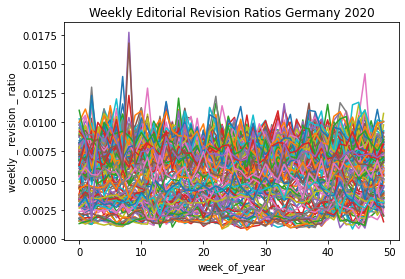

In [740]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020) 
plt.title('Weekly Editorial Revision Ratios Germany 2020')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.show()

### 2.4 Prepare editorship data Germany for 2019

In [741]:
#We get all data which is from 2019 and  where  1<week_of_year<52 

revs_deutch_2019=revs_deutch.loc[(revs_deutch['Date'] >= '2019-01-01 00:00:00') & (revs_deutch['Date'] < '2020-01-01 00:00:00') & (revs_deutch['week_of_year'] < 52)& (1<revs_deutch['week_of_year'])]
revs_deutch_2019.head(10)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
8904,8904,2019,1,7,0,755,20190107,2019-01-07,2,0
8905,8905,2019,1,7,1,676,20190107,2019-01-07,2,1
8906,8906,2019,1,7,2,868,20190107,2019-01-07,2,2
8907,8907,2019,1,7,3,753,20190107,2019-01-07,2,3
8908,8908,2019,1,7,4,794,20190107,2019-01-07,2,4
8909,8909,2019,1,7,5,372,20190107,2019-01-07,2,5
8910,8910,2019,1,7,6,519,20190107,2019-01-07,2,6
8911,8911,2019,1,7,7,920,20190107,2019-01-07,2,7
8912,8912,2019,1,7,8,1119,20190107,2019-01-07,2,8
8913,8913,2019,1,7,9,1334,20190107,2019-01-07,2,9


In [742]:
revs_deutch_2019.tail(5)

,index,y,m,d,h,c,dateInt,Date,week_of_year,hour_of_week
17299,17299,2019,12,22,19,1238,20191222,2019-12-22,51,163
17300,17300,2019,12,22,20,1200,20191222,2019-12-22,51,164
17301,17301,2019,12,22,21,1115,20191222,2019-12-22,51,165
17302,17302,2019,12,22,22,955,20191222,2019-12-22,51,166
17303,17303,2019,12,22,23,922,20191222,2019-12-22,51,167


In [743]:

grouped_deutch_2019=revs_deutch_2019.groupby(['week_of_year', 'hour_of_week']).sum()
grouped_deutch_2019 = grouped_deutch_2019.reset_index()
grouped_deutch_2019.head(10)

,week_of_year,hour_of_week,index,y,m,d,h,c
0,2,0,8904,2019,1,7,0,755
1,2,1,8905,2019,1,7,1,676
2,2,2,8906,2019,1,7,2,868
3,2,3,8907,2019,1,7,3,753
4,2,4,8908,2019,1,7,4,794
5,2,5,8909,2019,1,7,5,372
6,2,6,8910,2019,1,7,6,519
7,2,7,8911,2019,1,7,7,920
8,2,8,8912,2019,1,7,8,1119
9,2,9,8913,2019,1,7,9,1334


In [744]:
grouped_deutch_2019.tail(5)

,week_of_year,hour_of_week,index,y,m,d,h,c
8395,51,163,17299,2019,12,22,19,1238
8396,51,164,17300,2019,12,22,20,1200
8397,51,165,17301,2019,12,22,21,1115
8398,51,166,17302,2019,12,22,22,955
8399,51,167,17303,2019,12,22,23,922


In [745]:


array_weekly_events_deutch_2019 = np.zeros((52,168))



for  i in range (grouped_deutch_2019.shape[0]):
    
    week=grouped_deutch_2019.iloc[i]['week_of_year']
    hour=grouped_deutch_2019.iloc[i]['hour_of_week']
    array_weekly_events_deutch_2019[week][hour]= grouped_deutch_2019.iloc[i]['c']

print(array_weekly_events_deutch_2019)

[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [ 755.  676.  868. ... 1220.  834. 1024.]
 ...
 [ 396.  305.  365. ... 1259.  900.  883.]
 [ 426.  353.  346. ... 1232. 1021.  995.]
 [ 599.  353.  422. ... 1115.  955.  922.]]


In [746]:
print(array_weekly_events_deutch_2020[3][:])

[ 502.  309.  245.  456.  538.  625. 1047. 1009. 1079.  974. 1134. 1160.
 1210. 1309. 1320. 1335. 1552. 1621. 1691. 1697. 1590. 1396. 1107.  707.
  573.  431.  235.  627.  569.  621.  798. 1116. 1001. 1070. 1070. 1096.
 1162. 1314. 1181. 1265. 1386. 1713. 1320. 1372. 1778. 1536.  938.  791.
  407.  295.  374.  774.  586.  718.  769. 1018. 1232. 1250. 1397. 1150.
 1193. 1337. 1476. 1413. 1392. 1585. 1851. 1392. 1346. 1232.  886.  620.
  447.  320.  252.  682.  499.  725.  686. 1125. 1180. 1260. 1168.  970.
 1122. 1166. 1535. 1154. 1402. 1523. 1317. 1041. 1512. 1161.  998.  652.
  379.  288.  224.  618.  436.  577.  589.  898.  991. 1076. 1211. 1169.
 1195. 1111. 1189. 1301. 1510. 1158. 1178. 1016. 1306. 1102. 1112.  682.
  407.  281.  262.  711.  458.  688.  633.  858. 1049. 1268. 1440. 1352.
 1234. 1426. 1519. 1316. 1636. 1441. 1719. 1434. 1481. 1380.  964.  778.
  561.  366.  421.  777.  551.  602.  639.  816.  952. 1473. 1511. 1641.
 1867. 1574. 1514. 1425. 1557. 1962. 1510. 1501. 15

In [747]:
weekly_sum_deutch_2019=np.sum(array_weekly_events_deutch_2019 , axis=1)
print(weekly_sum_deutch_2019)

[     0.      0. 193607. 178849. 194238. 182147. 180296. 176237. 188794.
 180488. 199201. 202202. 174986. 177972. 168785. 174221. 175310. 203676.
 207502. 200327. 199579. 200205. 175434. 169195. 167120. 164316. 164573.
 172203. 183853. 159026. 164046. 171402. 172702. 177445. 178150. 172475.
 174850. 159268. 176457. 184150. 170029. 163678. 165601. 167674. 174043.
 172207. 164424. 174233. 171134. 158792. 159864. 155790.]


In [748]:
#we need the yearly_sums to be able to normalize the daily counts by this total yearly sum
yearly_sum_2019_deutch=np.sum(weekly_sum_deutch_2019)
yearly_sum_2019_deutch

8842756.0

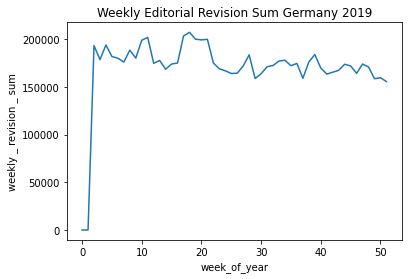

In [749]:
ax = plt.gca()

plt.plot(weekly_sum_deutch_2019) 
plt.title('Weekly Editorial Revision Sum Germany 2019')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.show()

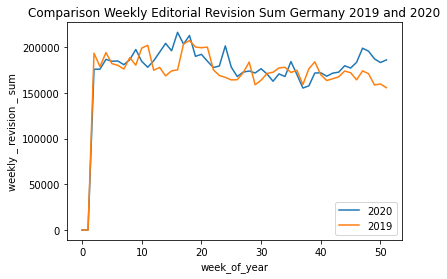

In [750]:

plt.plot(weekly_sum_deutch_2020, label= '2020') 
plt.plot(weekly_sum_deutch_2019, label= '2019') 

plt.title('Comparison Weekly Editorial Revision Sum Germany 2019 and 2020')
plt.ylabel('weekly _ revision _ sum')
plt.xlabel('week_of_year')
plt.legend()

plt.show()

### Normalize by weekly sums

In [751]:

array_weekly_ratios_deutch_2019=np.zeros((50,168))
    
for i in range (50):
    
    
    array_weekly_ratios_deutch_2019[i]=array_weekly_events_deutch_2019[i+2]/weekly_sum_deutch_2019[i+2]

print(array_weekly_ratios_deutch_2019)

[[0.00389965 0.00349161 0.00448331 ... 0.00630143 0.0043077  0.00528906]
 [0.00387478 0.00333242 0.00433886 ... 0.00829191 0.00542916 0.00498745]
 [0.0023116  0.00284187 0.0041341  ... 0.00761437 0.00891175 0.00862859]
 ...
 [0.00249383 0.00192075 0.0022986  ... 0.00792861 0.00566779 0.00556073]
 [0.00266477 0.00220813 0.00216434 ... 0.00770655 0.00638668 0.00622404]
 [0.00384492 0.00226587 0.00270877 ... 0.00715707 0.00613005 0.00591822]]


In [752]:
print(array_weekly_ratios_deutch_2019[1][:])

[0.00387478 0.00333242 0.00433886 0.00384123 0.00409843 0.00242104
 0.00363994 0.00407606 0.00618399 0.00674312 0.00627345 0.00722397
 0.008236   0.00734698 0.00833664 0.01084714 0.00749235 0.00739171
 0.00767128 0.00873922 0.00847083 0.00683817 0.00596034 0.004501
 0.00300253 0.00399219 0.00369026 0.00228685 0.00290189 0.00201287
 0.00333801 0.00409843 0.00753708 0.0090691  0.00896846 0.00716247
 0.00670957 0.00683817 0.00756504 0.00773278 0.00811299 0.00825836
 0.00720161 0.00702268 0.00853793 0.00716247 0.00577582 0.00422144
 0.00271178 0.00323178 0.00366231 0.00284038 0.00352252 0.00217502
 0.0033436  0.0048868  0.00525024 0.00593797 0.00801794 0.00771601
 0.00708419 0.0072687  0.00693881 0.00708419 0.00809062 0.00717924
 0.0074644  0.00811299 0.00894609 0.00696677 0.00452896 0.0039866
 0.00188427 0.00207438 0.0028963  0.00269501 0.00339392 0.00232039
 0.00352252 0.00465197 0.00516637 0.00656979 0.00596034 0.00722397
 0.00707301 0.00699473 0.00774955 0.00770482 0.00759859 0.0067487

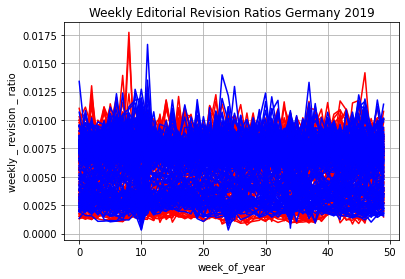

In [753]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020, color='red') 
plt.plot(array_weekly_ratios_deutch_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Germany 2019')
plt.ylabel('weekly _ revision _ ratio')
plt.xlabel('week_of_year')
plt.grid()
plt.show()

# Part three


### Let's instantiate a dictionary to keep the correlations after evey step

In [754]:
earth_correlations={ }
jensen_correlations={ }

## 3.1  earthmover and jensenshanon plots

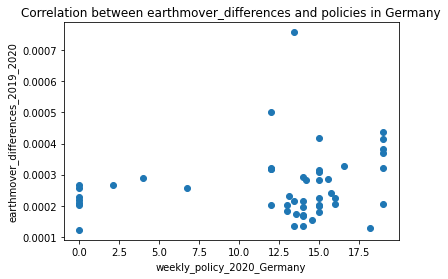

correlation and p_value are:  0.1865256005928233 0.19463380762033358


In [755]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))




plt.scatter(weekly_ratio_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)

#save to dictionary

earth_correlations['basic_earthmover']=corr


In [756]:
print(earth_correlations)

{'basic_earthmover': 0.1865256005928233}


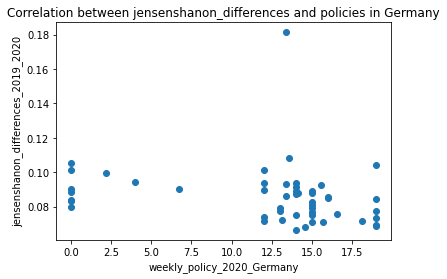

correlation and p_value are:  -0.2165308314606189 0.13095148062781123


In [757]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)

# save to dict

jensen_correlations['basic_jensen']=corr


## Normalize 2020 and 2019 ratios by yearly sum as well


In [758]:

array_weekly_ratios_deutch_2019_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    
    array_weekly_ratios_deutch_2019_weeklyyearlynorm[i]=array_weekly_events_deutch_2019[i]/yearly_sum_2019_deutch

    
    
    
array_weekly_ratios_deutch_2020_weeklyyearlynorm=np.zeros((50,168))
for i in range (50):
    
    array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]=array_weekly_events_deutch_2020[i]/yearly_sum_2020_deutch

print(array_weekly_ratios_deutch_2020_weeklyyearlynorm)



[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.76300435e-05 4.06219417e-05 3.34856546e-05 ... 1.40090804e-04
  1.03091901e-04 1.11435867e-04]
 ...
 [6.36776383e-05 5.24791571e-05 2.60200005e-05 ... 1.39871226e-04
  1.18242787e-04 9.96884407e-05]
 [5.17106339e-05 2.62395786e-05 3.73282707e-05 ... 1.38004813e-04
  1.32185994e-04 1.06275783e-04]
 [5.73098745e-05 7.42173854e-05 4.04023636e-05 ... 1.27904222e-04
  1.08581352e-04 8.21221956e-05]]


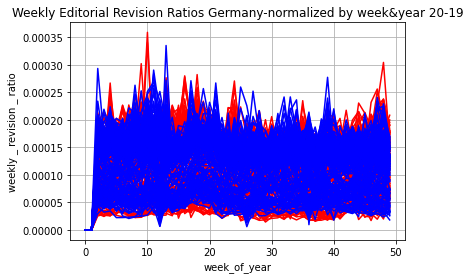

In [759]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020_weeklyyearlynorm, color='red') 
plt.plot(array_weekly_ratios_deutch_2019_weeklyyearlynorm, color='blue') 
plt.title('Weekly Editorial Revision Ratios Germany-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

## Plot x and y after yearly normalization

/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


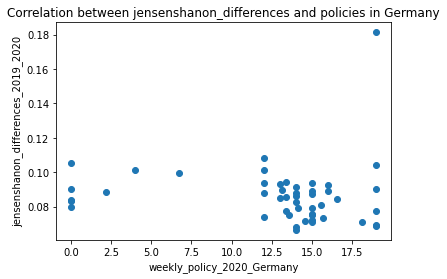

In [760]:

#jensen shanon divergence

jensenshanon_differences= []
  

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i], array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]))
    

plt.scatter(weekly_ratio_policy_2020_deutch, jensenshanon_differences) 
plt.title('Correlation between jensenshanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['normalizedyearlyweekly_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_deutch)
    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['normalizedyearlyweekly_jensen']=corr


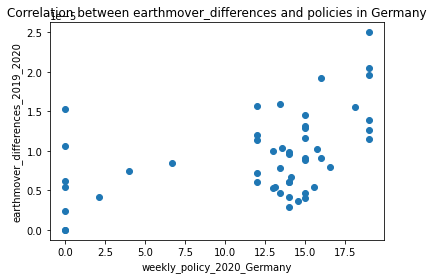

correlation and p_value are:  0.46226157731798645 0.0007258030300108528


In [761]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i], array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]))



plt.scatter(weekly_ratio_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)

earth_correlations['normalizedyearlyweekly_earth']=corr


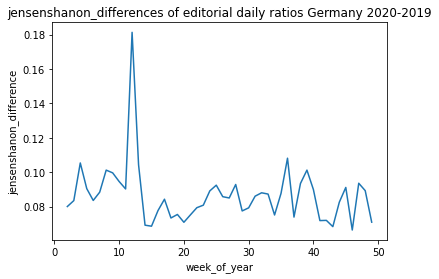

In [762]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Germany 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

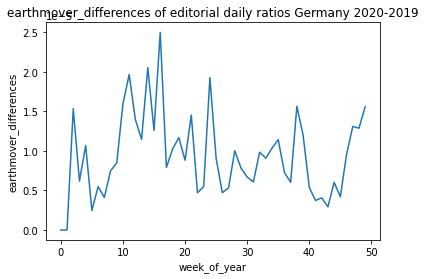

In [763]:
ax = plt.gca()

plt.plot(earthmover_differences) 
plt.title('earthmover_differences of editorial daily ratios Germany 2020-2019')
plt.ylabel('earthmover_differences')
plt.xlabel('week_of_year')
plt.show()

## let's look at the 168 values from the week 20th

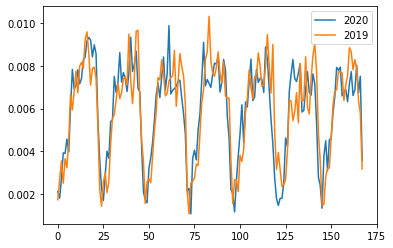

In [764]:
plt.plot(array_weekly_ratios_deutch_2020[20], label='2020' )

plt.plot(array_weekly_ratios_deutch_2019[20], label='2019' )
plt.legend()

plt.show()

In [765]:
print(earthmover_differences[20])

8.820963342559271e-06


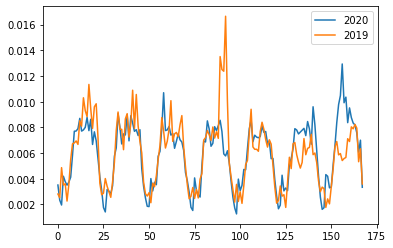

In [766]:
# Week 11 th 

plt.plot(array_weekly_ratios_deutch_2020[11], label='2020' )

plt.plot(array_weekly_ratios_deutch_2019[11],label='2019' )
plt.legend()

plt.show()

In [767]:
print(array_weekly_ratios_deutch_2019[11])

[0.00280943 0.00252849 0.00486593 0.00350617 0.00361855 0.0022644
 0.00356236 0.00548401 0.00672016 0.0067932  0.00694491 0.00667521
 0.00851819 0.00809678 0.01030499 0.00930483 0.00883847 0.01134448
 0.00946216 0.00792259 0.00960263 0.00983863 0.00716405 0.0036635
 0.00275324 0.00287686 0.00401749 0.00341627 0.002978   0.00255658
 0.00377026 0.00527611 0.00774841 0.00919808 0.00786079 0.00784955
 0.00626503 0.00865867 0.00906884 0.00724271 0.00827658 0.01089497
 0.00792259 0.01056346 0.00813049 0.00690558 0.00601218 0.00374778
 0.00284314 0.0026521  0.00291619 0.00213517 0.00365788 0.00338255
 0.004231   0.0055121  0.00659092 0.0087598  0.00769222 0.00639426
 0.00692806 0.00786641 0.01008024 0.0069112  0.00749556 0.00760794
 0.00728204 0.00820354 0.00891713 0.00648417 0.00492774 0.00353988
 0.0024442  0.00263525 0.00332075 0.0024723  0.00316904 0.00250601
 0.00397254 0.00439957 0.00701234 0.00720338 0.00775403 0.00742252
 0.00697863 0.00802935 0.00716967 0.00765851 0.00714719 0.013513

## 3.2 Outlier detection & removal  for 2019

Let's try first to remove one example: the largest 2019 jump which takes place a bit after the 10th week

In [768]:

# LET'S find the maximum value of the 11th array

print(np.max(array_weekly_ratios_deutch_2019[11]))

0.016654305171600027


In [769]:
# get index position of the above maximum value 

np.where(array_weekly_ratios_deutch_2019[11] == 0.016654305171600027)

(array([92]),)

In [770]:
#get the exact index
print(np.where(array_weekly_ratios_deutch_2019[11] == 0.016654305171600027)[0][0])

92


In [771]:
# let s see elements before and after the the outlier because we wanto susbsutitue the outlier by average of its before and after)
print(array_weekly_ratios_deutch_2019[11][90:94])

[0.01250197 0.01237273 0.01665431 0.010069  ]


In [772]:

# see  the average of before and after the max element 
array_weekly_ratios_deutch_2019[11][92]=(array_weekly_ratios_deutch_2019[11][90]+array_weekly_ratios_deutch_2019[11][91])/2


print(array_weekly_ratios_deutch_2019[11][90:94])

[0.01250197 0.01237273 0.01243735 0.010069  ]


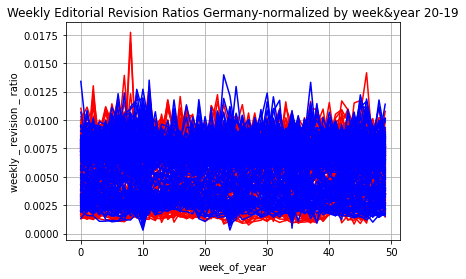

In [773]:
ax = plt.gca()

plt.plot(array_weekly_ratios_deutch_2020, color='red') 
plt.plot(array_weekly_ratios_deutch_2019, color='blue') 
plt.title('Weekly Editorial Revision Ratios Germany-normalized by week&year 20-19')
plt.ylabel('weekly _ revision _ ratio')
plt.grid()
plt.xlabel('week_of_year')
plt.show()

In [774]:
array_weekly_ratios_deutch_2019.shape

(50, 168)

### remove outliers 10 times from every array in 50 weekly arrays for 2019

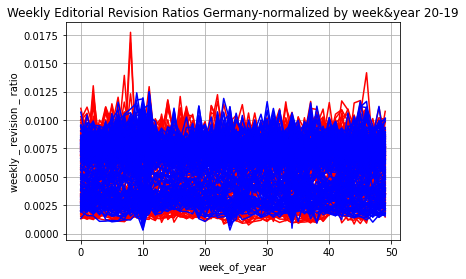

In [775]:
#without_outlier_array_weekly_ratios_deutch_2019=np.zeros((50,168))

for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_deutch_2019[i])
        getindex=np.where(array_weekly_ratios_deutch_2019[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_deutch_2019[i][getindex]=(array_weekly_ratios_deutch_2019[i][getindex-1]+array_weekly_ratios_deutch_2019[i][getindex+1])/2
      
    #plot every 10th loop
    if j%10 ==0:
        ax = plt.gca()
        plt.plot(array_weekly_ratios_deutch_2020, color='red') 
        plt.plot(array_weekly_ratios_deutch_2019, color='blue') 
        plt.title('Weekly Editorial Revision Ratios Germany-normalized by week&year 20-19')
        plt.ylabel('weekly _ revision _ ratio')
        plt.grid()
        plt.xlabel('week_of_year')
        plt.show()  

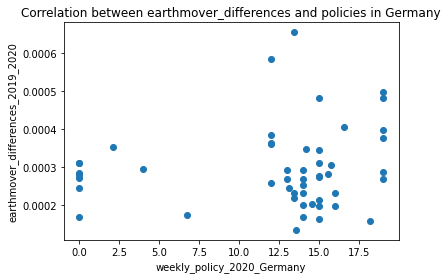

correlation and p_value are:  0.13034570258480405 0.3669353546938734


In [776]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))




plt.scatter(weekly_ratio_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['without_outlier10_earth']=corr



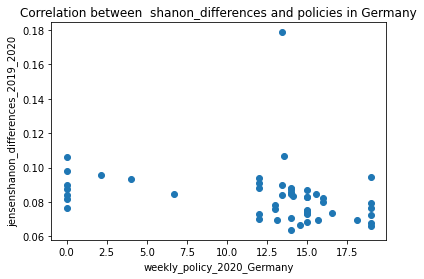

correlation and p_value are:  -0.25331061654505604 0.07590664092790937


In [777]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    
plt.scatter(weekly_ratio_policy_2020_deutch, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['without_outlier10_jensen']=corr




In [778]:
print(jensenshanon_differences)

[0.07655238458023399, 0.08162360986656925, 0.10600104265873973, 0.08995925959988736, 0.0843708135396791, 0.08775883725554727, 0.09788825758553106, 0.09578306960505303, 0.09350087953872187, 0.08469818731692551, 0.17861502586654648, 0.09479235570702156, 0.0658887076254861, 0.06773084946444173, 0.07646030587625466, 0.0796876028854219, 0.07269409149250959, 0.07377716465737781, 0.0695836608939683, 0.0733111545580664, 0.07515930684754425, 0.07384899983071352, 0.08300487409049633, 0.08493133239231918, 0.08258556651596685, 0.07992964510486551, 0.0898464725508352, 0.07609179950324461, 0.07816843848805638, 0.08413526985522415, 0.08365812468083252, 0.08486136831322562, 0.07047165801072433, 0.08678052642230644, 0.10702000319289334, 0.07289066428702655, 0.09127387943530103, 0.09414297515567373, 0.08795679923004704, 0.07036292413462254, 0.06928742695196506, 0.06671162854223266, 0.0831163515629886, 0.08837206801843388, 0.06374111984210502, 0.08772867910533796, 0.08596481382830128, 0.06849523354260655

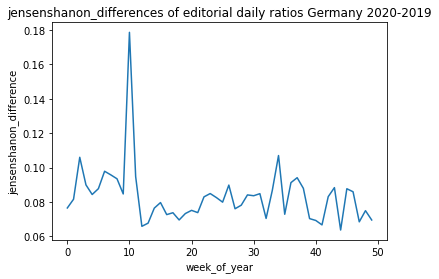

In [779]:
ax = plt.gca()

plt.plot(jensenshanon_differences) 
plt.title('jensenshanon_differences of editorial daily ratios Germany 2020-2019')
plt.ylabel('jensenshanon_difference')
plt.xlabel('week_of_year')
plt.show()

In [780]:
print(len(array_weekly_events_deutch_2019[2:]))

50


### Let's remove the outliers from yearly_weekly_normalized data and find the correaltion again

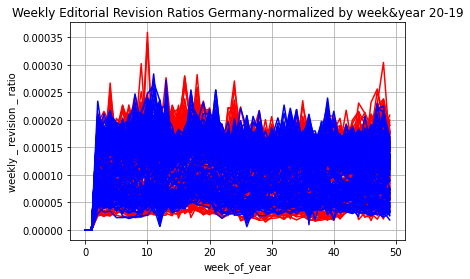

In [781]:
#without_outlier_array_weekly_ratios_deutch_2019=np.zeros((50,168))



for j in range (10): #remove outlier n times  and plot after every time removed  - repeat outlier removal n times
    
    for i in range (50):
    
    
        maxvalue=np.max(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i])
        getindex=np.where(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i]== maxvalue)[0][0]
        if getindex+1 <168:
            array_weekly_ratios_deutch_2019_weeklyyearlynorm[i][getindex]=(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i][getindex-1]+array_weekly_ratios_deutch_2019_weeklyyearlynorm[i][getindex+1])/2
      
    #plot every 10th loop
    if j%10 ==0:
        ax = plt.gca()
        plt.plot(array_weekly_ratios_deutch_2020_weeklyyearlynorm, color='red')
        plt.plot(array_weekly_ratios_deutch_2019_weeklyyearlynorm, color='blue') 
        plt.title('Weekly Editorial Revision Ratios Germany-normalized by week&year 20-19')
        plt.ylabel('weekly _ revision _ ratio')
        plt.grid()
        plt.xlabel('week_of_year')
        plt.show()  

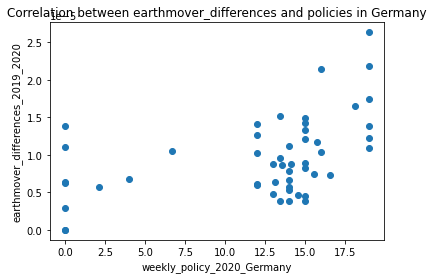

correlation and p_value are:  0.4659966639751486 0.000648272477953599


In [782]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i], array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]))


plt.scatter(weekly_ratio_policy_2020_deutch, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, weekly_ratio_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['normalizedyearlyweekly_without_outlier10_earth']=corr



/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1288: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=0)
/Users/luna/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:1289: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=0)


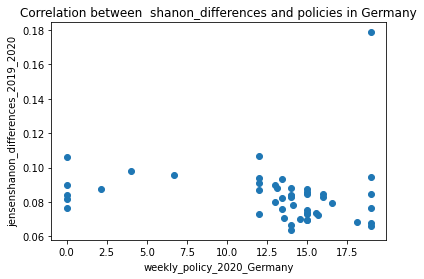

In [784]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i], array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]))
    
plt.scatter(weekly_ratio_policy_2020_deutch, jensenshanon_differences) 

plt.title('Correlation between  shanon_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()


if "nan" or "inf" in jensenshanon_differences:
    corr, p_value = "nan", "nan"
    jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']="nan"

else:

    corr, p_value=stats.pearsonr(jensenshanon_differences, weekly_ratio_policy_2020_deutch)
    print("correlation and p_value are: ", corr, p_value)
    jensen_correlations['normalizedyearlyweekly_without_outlier10_jensen']=corr



## 3.3 Moving average  
Test with window size 3 days

https://www.kite.com/python/answers/how-to-find-the-moving-average-of-a-list-in-python

In [785]:
# We have 168 values - the window size is 72 = 3 days 
# --> each point in array of size 168 is replace by the average of 72 points around it

array_weekly_events_deutch_2019_50=array_weekly_events_deutch_2019[2:]

moving_average_weekly_ratios_deutch_2019=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_deutch_2019_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_deutch_2019_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_deutch_2019[i]= np.asarray(moving_averages)

        

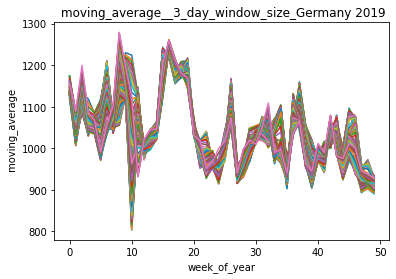

In [786]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_deutch_2019) 
plt.title(' moving_average__3_day_window_size_Germany 2019')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

In [787]:

array_weekly_events_deutch_2020_50=array_weekly_events_deutch_2020[2:]

moving_average_weekly_ratios_deutch_2020=np.zeros((50,97))

for i in range (50):
            
        
    numbers = array_weekly_events_deutch_2020_50[i]
    window_size = 72



    j = 0
    moving_averages = []
    while j< 168 - window_size + 1:
            this_window = array_weekly_events_deutch_2020_50[i][j : j + window_size]

            window_average = sum(this_window) / window_size
            moving_averages.append(window_average)
            j += 1

    moving_average_weekly_ratios_deutch_2020[i]= np.asarray(moving_averages)

        

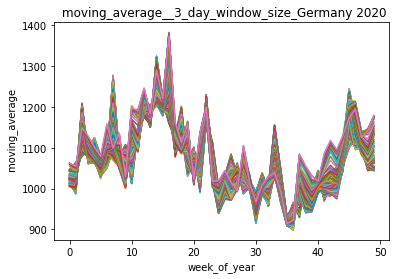

In [788]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_deutch_2020) 
plt.title(' moving_average__3_day_window_size_Germany 2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')
plt.show()

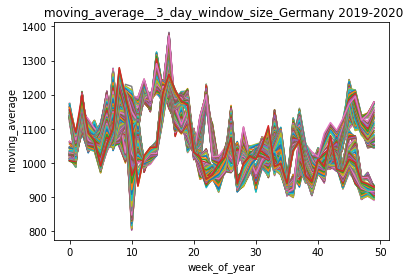

In [789]:
ax = plt.gca()
plt.plot( moving_average_weekly_ratios_deutch_2020) 
plt.plot( moving_average_weekly_ratios_deutch_2019) 

plt.title(' moving_average__3_day_window_size_Germany 2019-2020')
plt.ylabel(' moving_average')
plt.xlabel('week_of_year')

plt.show()

### 3.4 Testing other measures of difference: Kullback-Leiber divergence

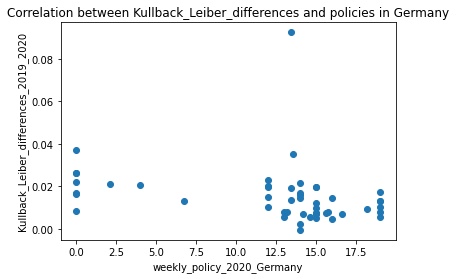

correlation and p_value are:  -0.26726370005979916 0.06060978389519852


In [790]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

kl_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    kl_differences.append(kl_divergence(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    

plt.scatter(weekly_ratio_policy_2020_deutch, kl_differences) 
plt.title('Correlation between Kullback_Leiber_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('Kullback_Leiber_differences_2019_2020')
plt.show()



corr, p_value=stats.pearsonr(kl_differences, weekly_ratio_policy_2020_deutch)
print("correlation and p_value are: ", corr, p_value)




## 3.5 Feature importance - feature selection - dimensionality reduction
Which policy indicators have the highest correlation with the editorial data?
Let's first look at correlations

In [791]:

# make up a new dataset consisting of IV and DV - add the earthmover as a column to the policy data set  


edit_and_policy= weekly_policy_2020_deutch_indicators_ratio
edit_and_policy['jensenshanon_differences']=jensenshanon_differences
edit_and_policy['earthmover_differences']=earthmover_differences


edit_and_policy.head(10)


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
week_of_year,,,,,,,,,,
2,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,0.000000
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.076552,0.000014
5,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.081624,0.000006
6,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.106001,0.000011
7,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.089959,0.000003
8,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.084371,0.000006
9,1.428571,0.0,0.285714,0.000000,0.0,0.0,0.428571,2.142857,0.087759,0.000006
10,2.000000,0.0,1.000000,0.000000,0.0,0.0,1.000000,4.000000,0.097888,0.000007


## 3.5.1  Correlation Heatmap

In [792]:
corr = edit_and_policy.corr()
corr.style.background_gradient(cmap ='coolwarm')


,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_home,weekly_movement,weekly_travel,weekly_sum,jensenshanon_differences,earthmover_differences
weekly_school,1.000000,0.458402,0.611697,0.511254,0.464545,0.686198,0.691435,0.745387,0.068969,0.581273
weekly_workplace,0.458402,1.000000,0.882962,0.967484,0.262576,0.638875,0.881043,0.902815,-0.197633,0.277158
weekly_events,0.611697,0.882962,1.000000,0.918615,0.324236,0.627088,0.931223,0.926301,-0.115352,0.329574
weekly_gatherings,0.511254,0.967484,0.918615,1.000000,0.329663,0.606738,0.920800,0.930270,-0.172998,0.334881
weekly_home,0.464545,0.262576,0.324236,0.329663,1.000000,0.228703,0.460199,0.508966,0.083740,0.436125
weekly_movement,0.686198,0.638875,0.627088,0.606738,0.228703,1.000000,0.716191,0.765639,-0.140319,0.305789
weekly_travel,0.691435,0.881043,0.931223,0.920800,0.460199,0.716191,1.000000,0.974616,-0.064217,0.430981
weekly_sum,0.745387,0.902815,0.926301,0.930270,0.508966,0.765639,0.974616,1.000000,-0.102465,0.465997
jensenshanon_differences,0.068969,-0.197633,-0.115352,-0.172998,0.083740,-0.140319,-0.064217,-0.102465,1.000000,-0.003531
earthmover_differences,0.581273,0.277158,0.329574,0.334881,0.436125,0.305789,0.430981,0.465997,-0.003531,1.000000


In [793]:
df_final=weekly_policy_2020_deutch_indicators_ratio.iloc[:,:8]
df_final.head()

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_home,weekly_movement,weekly_travel,weekly_sum
week_of_year,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [794]:

#1
df2_meaned=df_final.apply(lambda x:x-x.mean())
df2_meaned
#2 covariance
cov_mat =df2_meaned.cov()
cov_mat

,weekly_school,weekly_workplace,weekly_events,weekly_gatherings,weekly_home,weekly_movement,weekly_travel,weekly_sum
weekly_school,0.930912,0.371812,0.432187,0.770112,0.341474,0.575360,0.843332,4.267289
weekly_workplace,0.371812,0.706714,0.543557,1.269779,0.168172,0.466739,0.936293,4.503357
weekly_events,0.432187,0.543557,0.536243,1.050212,0.180891,0.399067,0.862041,4.024840
weekly_gatherings,0.770112,1.269779,1.050212,2.437393,0.392112,0.823190,1.817276,8.617626
weekly_home,0.341474,0.168172,0.180891,0.392112,0.580433,0.151420,0.443215,2.300808
weekly_movement,0.575360,0.466739,0.399067,0.823190,0.151420,0.755219,0.786789,3.947988
weekly_travel,0.843332,0.936293,0.862041,1.817276,0.443215,0.786789,1.598034,7.310421
weekly_sum,4.267289,4.503357,4.024840,8.617626,2.300808,3.947988,7.310421,35.207197


In [795]:
eig_value, eig_vectors =np.linalg.eig(cov_mat)
eig_vectors

array([[-0.11139511,  0.59428964, -0.22675088,  0.59733191,  0.29212306,
        -0.34296216, -0.15174984,  0.01423512],
       [-0.11916615, -0.33082261, -0.0551034 , -0.11039668,  0.2987257 ,
        -0.50142358,  0.08072576, -0.71690496],
       [-0.1062964 , -0.14265524, -0.03069338,  0.25473817, -0.37158366,
        -0.38500855,  0.7457601 ,  0.24505675],
       [-0.22806897, -0.55838717,  0.07202692,  0.12187862,  0.34453387,
        -0.26633131, -0.32916581,  0.56405669],
       [-0.05938634,  0.37731312,  0.75937354, -0.34336551,  0.05573716,
        -0.37742055,  0.00634096,  0.1181817 ],
       [-0.10360971,  0.22632046, -0.60099556, -0.64648076, -0.02872008,
        -0.3033057 , -0.03017399,  0.25530645],
       [-0.19276131, -0.06200422,  0.01931498,  0.11516138, -0.7504098 ,
        -0.26365817, -0.5394007 , -0.14757958],
       [-0.92663777,  0.08831088,  0.03465245, -0.04649555,  0.04003407,
         0.32837652,  0.11850439, -0.08187705]])

In [796]:
sorted_index =np.argsort(eig_value)[::-1]
sorted_eigenvalue=eig_value[sorted_index]
sorted_eigenvector= eig_vectors[:,sorted_index]

In [797]:
n_components=2
eig_vector_subset=sorted_eigenvector[:,0:n_components]
X_reduced=np.dot(eig_vector_subset.transpose(), df2_meaned.transpose()).transpose()
principal_df2_two_dim=pd.DataFrame(X_reduced, columns=['PC1','PC2'])
print(principal_df2_two_dim)


          PC1       PC2
0   13.206131  0.174819
1   13.206131  0.174819
2   13.206131  0.174819
3   13.206131  0.174819
4   13.206131  0.174819
5   13.206131  0.174819
6   13.206131  0.174819
7   10.948360  1.145710
8    8.977732  1.511982
9    6.116587  1.528103
10  -1.167210  2.272540
11  -7.194410  1.414340
12  -7.194410  1.414340
13  -7.194410  1.414340
14  -7.194410  1.414340
15  -7.194410  1.414340
16  -7.194410  1.414340
17  -4.747772  0.066563
18  -3.864501 -0.207024
19  -3.064930 -0.225815
20  -3.064930 -0.225815
21  -3.064930 -0.225815
22  -3.064930 -0.225815
23  -3.658092  0.164243
24  -4.102963  0.456786
25  -4.102963  0.456786
26  -1.333730 -0.310464
27  -0.872191 -0.438339
28  -0.872191 -0.438339
29  -1.367065 -0.639800
30  -2.141852 -0.481565
31  -1.910223  0.244261
32  -1.910223  0.244261
33  -3.064930 -0.225815
34  -1.588699 -0.885556
35   0.033598 -1.537678
36   0.033598 -1.537678
37   0.033598 -1.537678
38   0.033598 -1.537678
39   0.033598 -1.537678
40  -1.118558 -1

In [798]:
principal_df2_two_dim.var()

PC1    40.991652
PC2     0.878645
dtype: float64

In [799]:
PC1=list(principal_df2_two_dim.iloc[:,0])

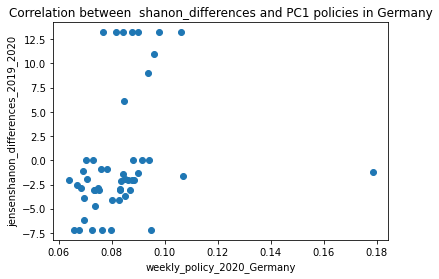

correlation and p_value are:  0.25481664464068954 0.07412168601513172


In [800]:

#jensen shanon divergence

jensenshanon_differences= []

#print(extracted_daily_ratio_2020[1])


for i in range(len(array_weekly_ratios_deutch_2019)) :
    jensenshanon_differences.append(distance.jensenshannon(array_weekly_ratios_deutch_2019[i], array_weekly_ratios_deutch_2020[i]))
    
plt.scatter(jensenshanon_differences, PC1) 

plt.title('Correlation between  shanon_differences and PC1 policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('jensenshanon_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(jensenshanon_differences, PC1)
print("correlation and p_value are: ", corr, p_value)

jensen_correlations['PC1_basic_jensen']=corr





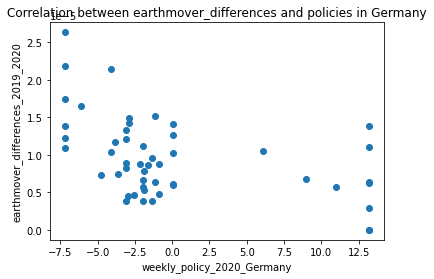

correlation and p_value are:  -0.4606956450358899 0.0007607166464211244


In [801]:
#earthmover   
    
#first we find the difference between array_weekly_ratios_deutch_2019[i] and array_weekly_ratios_deutch_2020[i]  
#and append this difference to a list

#dependent variable

earthmover_differences= []
for i in range(len(array_weekly_ratios_deutch_2019)) :
    earthmover_differences.append(wasserstein_distance(array_weekly_ratios_deutch_2019_weeklyyearlynorm[i], array_weekly_ratios_deutch_2020_weeklyyearlynorm[i]))


plt.scatter(PC1, earthmover_differences) 
plt.title('Correlation between earthmover_differences and policies in Germany')
plt.xlabel('weekly_policy_2020_Germany')
plt.ylabel('earthmover_differences_2019_2020')
plt.show()

corr, p_value=stats.pearsonr(earthmover_differences, PC1)
print("correlation and p_value are: ", corr, p_value)


earth_correlations['PC1_basic_earth']=corr



### 4. Results

In [802]:

for key, value in earth_correlations.items():
    print(key, ' : ', value)


basic_earthmover  :  0.1865256005928233
normalizedyearlyweekly_earth  :  0.46226157731798645
without_outlier10_earth  :  0.13034570258480405
normalizedyearlyweekly_without_outlier10_earth  :  0.4659966639751486
PC1_basic_earth  :  -0.4606956450358899


In [803]:

for key, value in jensen_correlations.items():
    print(key, ' : ', value)

basic_jensen  :  -0.2165308314606189
normalizedyearlyweekly_jensen  :  nan
without_outlier10_jensen  :  -0.25331061654505604
normalizedyearlyweekly_without_outlier10_jensen  :  nan
PC1_basic_jensen  :  0.25481664464068954
